# Evolución diaria del factor problemático (F) de la pandemia Argentina

F = (Nivel de exposición * probabilidad de contagio + 1) 

I<sub>n+1</sub> = I<sub>n</sub> * F

donde I<sub>n+1</sub> es la cantidad de casos para un día mientras que I<sub>n</sub> es la cantidad de casos para el día anterior, entonces

&rarr; F = I<sub>n+1</sub> / I<sub>n</sub>

<br>
<br>
<br>
<br>
__fuente__: Damián Pedraza @eltraductor_ok en https://youtu.be/-PUT0hZiZEw

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import requests
from io import StringIO

## Lectura de los datos

Disponible en: https://docs.google.com/spreadsheets/d/1Oso4ZC_mMOwtv6p5u65VpdzJQxnmF8bu6kxVygku_sc/edit?usp=sharing
__fuente__: Informe diario del Minsiterio de Salud &rarr; https://www.argentina.gob.ar/coronavirus/informe-diario

In [3]:
file_url = 'https://docs.google.com/spreadsheets/d/1Oso4ZC_mMOwtv6p5u65VpdzJQxnmF8bu6kxVygku_sc/export?format=csv&id=1Oso4ZC_mMOwtv6p5u65VpdzJQxnmF8bu6kxVygku_sc&gid=0'
file_text = requests.get(file_url).text
csv_raw = StringIO(file_text)
data = pd.read_csv(csv_raw)

Vista previa:

In [4]:
data.head()

,dia,casos,fallecidos
0,05/03/2020,1,0
1,06/03/2020,2,0
2,07/03/2020,2,0
3,08/03/2020,12,0
4,09/03/2020,17,0


## Calcular Factor problemático

In [5]:
data.loc[0, 'F'] = 0

In [6]:
for hoy in range(1, len(data)):
    # el F para hoy es: casos hoy / casos ayer 
    data.loc[hoy, 'F'] = data.loc[hoy, 'casos'] / data.loc[ hoy -1 , 'casos']

In [7]:
data

,dia,casos,fallecidos,F
0,05/03/2020,1,0,0.000000
1,06/03/2020,2,0,2.000000
2,07/03/2020,2,0,1.000000
3,08/03/2020,12,0,6.000000
4,09/03/2020,17,0,1.416667
5,10/03/2020,19,1,1.117647
6,11/03/2020,21,1,1.105263
7,12/03/2020,31,1,1.476190
8,13/03/2020,34,2,1.096774
9,14/03/2020,45,2,1.323529


## Graficar

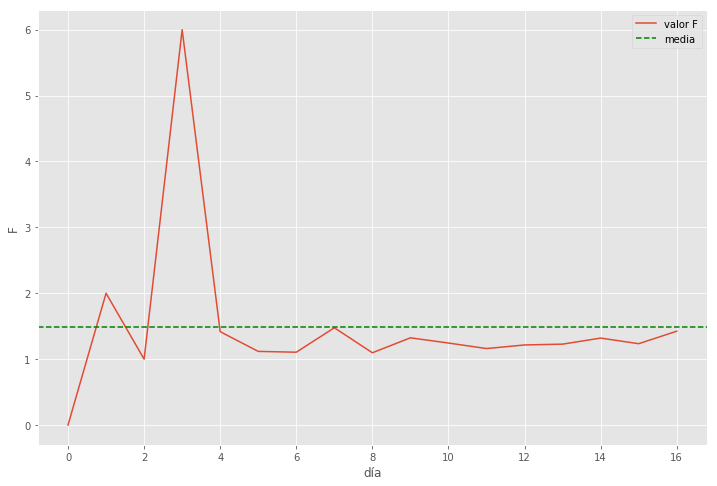

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

ax = plt.gca()

data.F.plot(label='valor F', figsize=(12, 8))
plt.axhline(data.F.mean(), color='g', linestyle='--', label='media')

plt.ylabel('F')
plt.xlabel('día')
plt.legend()

plt.show()

In [9]:
data.loc[0, 'evolucion_de_la_media_de_F'] = data.loc[0, 'F']

In [10]:
for hoy in range(1, len(data)):
    # el F para hoy es: casos hoy / casos ayer 
    data.loc[hoy, 'evolucion_de_la_media_de_F'] = data.loc[0:hoy, 'F'].mean()

In [11]:
data

,dia,casos,fallecidos,F,evolucion_de_la_media_de_F
0,05/03/2020,1,0,0.000000,0.000000
1,06/03/2020,2,0,2.000000,1.000000
2,07/03/2020,2,0,1.000000,1.000000
3,08/03/2020,12,0,6.000000,2.250000
4,09/03/2020,17,0,1.416667,2.083333
5,10/03/2020,19,1,1.117647,1.922386
6,11/03/2020,21,1,1.105263,1.805654
7,12/03/2020,31,1,1.476190,1.764471
8,13/03/2020,34,2,1.096774,1.690282
9,14/03/2020,45,2,1.323529,1.653607


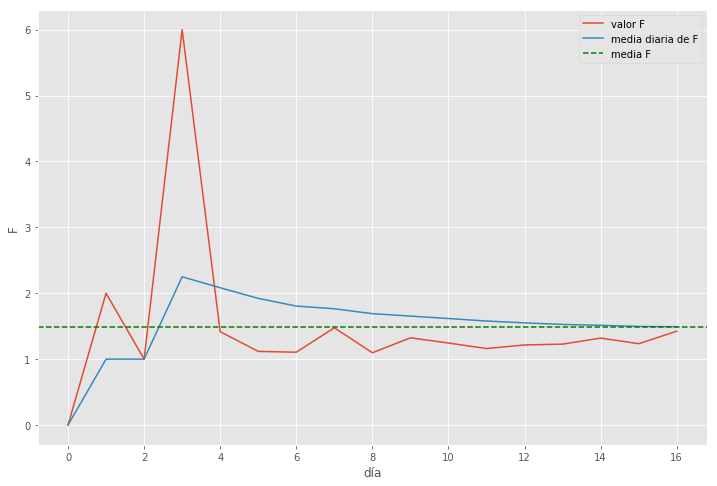

In [12]:
import matplotlib.pyplot as plt
ax = plt.gca()

data.F.plot(label='valor F', figsize=(12, 8))
data.evolucion_de_la_media_de_F.plot(label='media diaria de F')

plt.axhline(data.F.mean(), color='g', linestyle='--', label='media F')

plt.ylabel('F')
plt.xlabel('día')
plt.legend()

plt.show()

WIP:
- Lectura desde drive: ok
- Cargar datasets de otros países
- ...

# España:

In [13]:
# datos desde: https://rpubs.com/mohnabeel/covid-19_in_Spain
data_esp = pd.read_csv('https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv')

In [14]:
data_esp.head()

,cod_ine,CCAA,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,...,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020
0,1,Andalucía,1,6,8,12,12,13,13,12,...,219,269,437,554,683,859,1008,1287,1515,1725
1,2,Aragón,0,1,1,0,0,0,0,1,...,80,80,147,174,207,226,281,360,424,532
2,3,Asturias,0,0,0,1,1,1,2,5,...,67,92,137,177,193,242,292,344,486,545
3,4,Baleares,1,1,2,2,2,2,5,6,...,30,28,28,73,92,112,169,203,246,331
4,5,Canarias,6,6,6,7,7,7,7,8,...,70,90,109,119,148,181,220,287,348,414


Usamos la transpuesta:

In [15]:
data_esp = data_esp.T

Reemplazamos el encabezado:

In [16]:
data_esp.columns = data_esp.iloc[1]

Eliminamos el codigo y el nombre de CCAA (que ya lo tenemos en el encabezado)

In [17]:
data_esp.drop(['cod_ine', 'CCAA'], inplace=True)

Vista:

In [18]:
data_esp.head()

CCAA,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla-La Mancha,Castilla y León,Cataluña,Ceuta,C. Valenciana,Extremadura,Galicia,Madrid,Melilla,Murcia,Navarra,País Vasco,La Rioja,Total
27/02/2020,1,0,0,1,6,0,0,0,2,0,2,0,0,4,0,0,0,0,0,16
28/02/2020,6,1,0,1,6,0,0,2,3,0,8,0,0,5,0,0,0,0,0,32
29/02/2020,8,1,0,2,6,0,0,2,5,0,10,0,0,8,0,0,0,2,0,44
01/03/2020,12,0,1,2,7,1,1,3,6,0,15,4,0,10,0,0,1,3,0,66
02/03/2020,12,0,1,2,7,10,3,3,15,0,15,6,0,29,0,0,1,9,1,114


# Setup

Definimos una función para calcular el F:

In [19]:
def calcular_f_diario(data: pd.DataFrame, work_col: str, date_col:str,
                      date_col_format: str = "%d/%m/%Y") -> pd.DataFrame:

    response = data[[date_col, work_col]].copy()
    response.reset_index(inplace=True)
    response[date_col] = pd.to_datetime(response[date_col], format=date_col_format)
    response.sort_values(by=date_col, ascending=True, inplace=True)
    
    response.loc[0, 'F'] = 0
    for current in range(1, len(response)):
        # el F para hoy es: casos hoy / casos ayer 
        try:
            response.loc[current, 'F'] = response.loc[current, work_col] / response.loc[ current -1 , work_col]
        except ZeroDivisionError:
            response.loc[current, 'F'] = 0
        
    response.set_index(date_col, inplace=True)
    #response.sort_index(inplace=True)

    return response
    

In [20]:
resp = calcular_f_diario(data, work_col='casos', date_col='dia')

In [21]:
resp

,index,casos,F
dia,,,
2020-03-05,0,1,0.000000
2020-03-06,1,2,2.000000
2020-03-07,2,2,1.000000
2020-03-08,3,12,6.000000
2020-03-09,4,17,1.416667
2020-03-10,5,19,1.117647
2020-03-11,6,21,1.105263
2020-03-12,7,31,1.476190
2020-03-13,8,34,1.096774


Definimos la función graficadora:

In [22]:
def graficar_f(data: pd.DataFrame, work_column: str):
    # retorna lo ejes para seguir dibujando en el plot

    ax = plt.gca()
    data[work_column].plot(label=f'valor {work_column}', figsize=(12, 8))
    plt.axhline(data[work_column].mean(), color='g', linestyle='--', label=f'media {work_column}')

    plt.ylabel(f'{work_column}')
    plt.xlabel('día')
    plt.legend()

    plt.show()
    #return ax

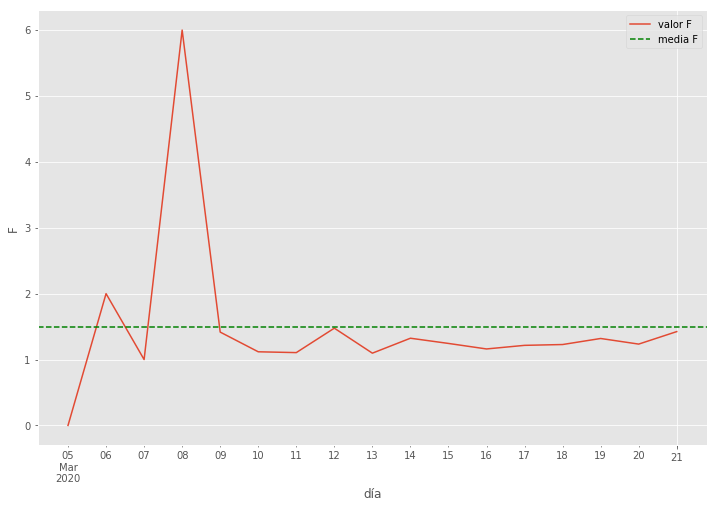

In [23]:
graficar_f(resp, 'F')

# Graficar España

Probar con una CCAA de España:

In [24]:
data_esp['dia'] = data_esp.index.values
resp = calcular_f_diario(data_esp, 'Madrid', 'dia')

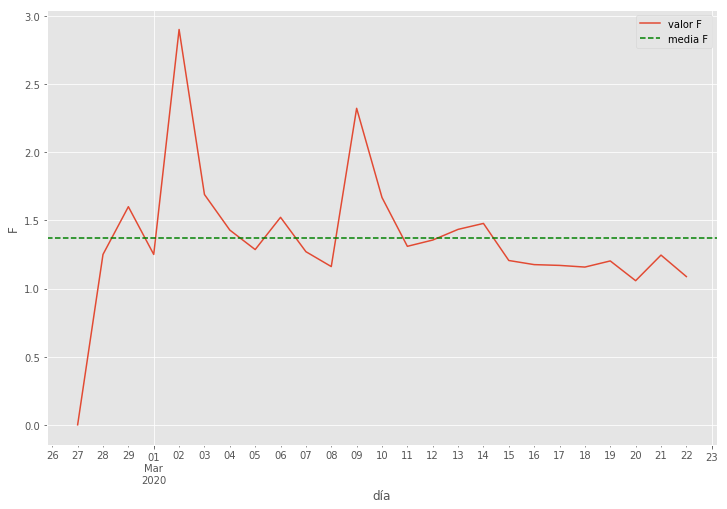

In [25]:
graficar_f(resp, 'F')

Según https://covid19.isciii.es/ al momento, las CCAA con mas casos son:
    - Cataluña	4704
    - País Vasco	2097
        
las de menos:
    - Ceuta	5
    - Melilla	25

In [26]:
data_esp.columns.values

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla-La Mancha', 'Castilla y León', 'Cataluña',
       'Ceuta', 'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid',
       'Melilla', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja', 'Total',
       'dia'], dtype=object)

## Evolución F en Cataluña:

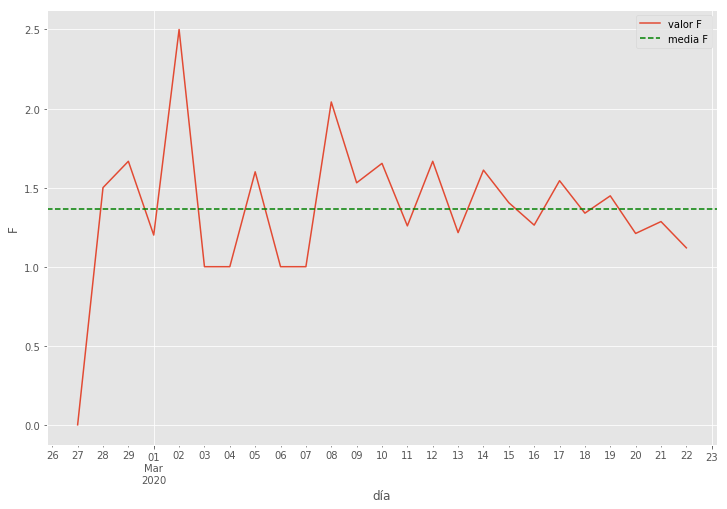

In [27]:
resp = calcular_f_diario(data_esp, 'Cataluña', 'dia')
graficar_f(resp, 'F')

## Evolución F en País Vasco:

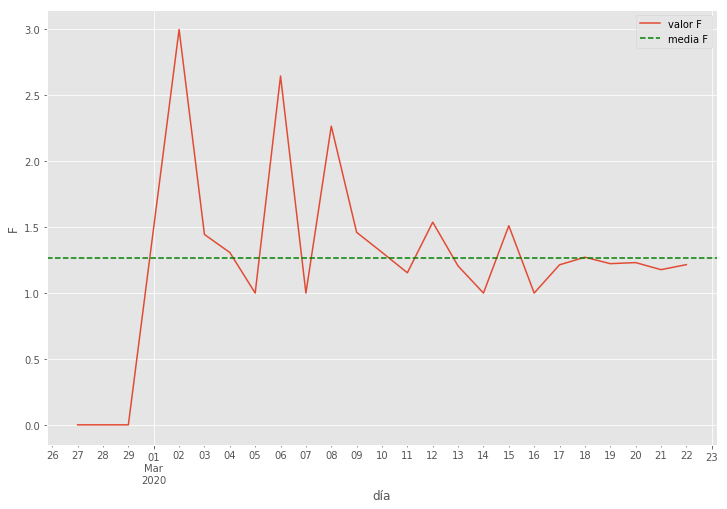

In [28]:
resp = calcular_f_diario(data_esp, 'País Vasco', 'dia')
graficar_f(resp, 'F')

## Evolución F en Ceuta:

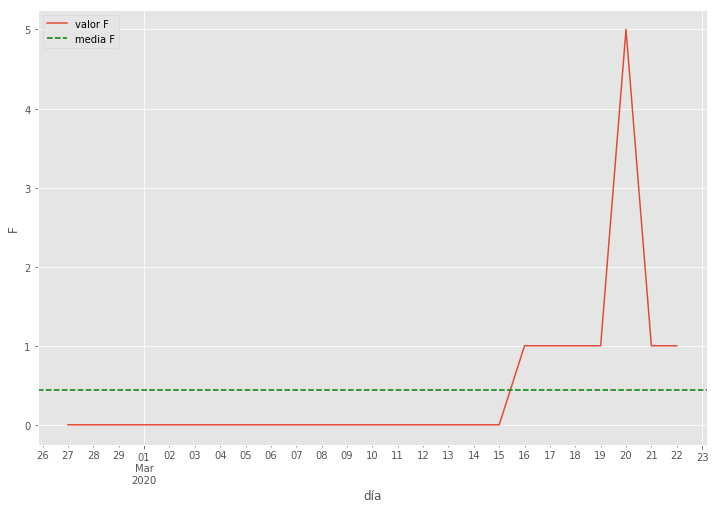

In [29]:
resp = calcular_f_diario(data_esp, 'Ceuta', 'dia')
graficar_f(resp, 'F')

## Evolución F en Melilla:

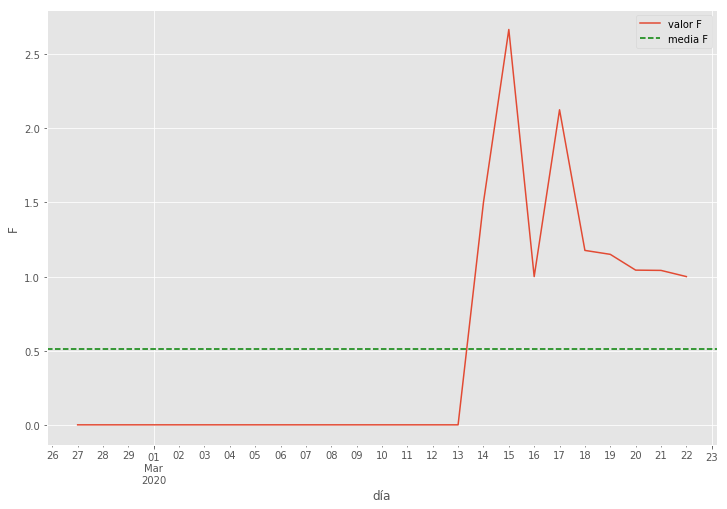

In [30]:
resp = calcular_f_diario(data_esp, 'Melilla', 'dia')
graficar_f(resp, 'F')

# Toda España: